# Imports

In [1]:
import numpy as np
import math

from scipy.misc import derivative
from scipy.integrate import quad
from scipy.optimize import minimize
import sympy

import scipy.linalg
from scipy import stats

from matplotlib import pyplot as plt

import pandas as pd
from google.colab import drive

import seaborn as sb

# Задание №6


In [24]:
drive.mount("/content/drive")
reports = pd.read_csv('/content/drive/MyDrive/PRAKTIKUM 6/nhsta_complaints_tesla.csv', sep=',')
reports

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,summary,type,productYear,productMake,productModel
0,11444023,"Tesla, Inc.",False,False,0,0,11/18/2021,12/16/2021,5yjsa1cn8cf,ELECTRICAL SYSTEM,I appears that Tesla had capped my battery. I ...,Vehicle,2012,TESLA,MODEL S
1,11442524,"Tesla, Inc.",False,False,0,0,12/01/2021,12/03/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,VISIBILITY/WIPER",The vehicle was not experiencing display or re...,Vehicle,2012,TESLA,MODEL S
2,11441219,"Tesla, Inc.",False,False,0,0,11/19/2021,11/21/2021,5YJSA1CN3CF,"ELECTRICAL SYSTEM,UNKNOWN OR OTHER",MCU failure after 12 months replacement that I...,Vehicle,2012,TESLA,MODEL S
3,11435793,"Tesla, Inc.",False,False,0,0,10/05/2021,10/06/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING","As the car drains the battery pretty quickly, ...",Vehicle,2012,TESLA,MODEL S
4,11434130,"Tesla, Inc.",False,False,0,0,09/22/2021,09/23/2021,5yjsa1cp0cf,"EXTERIOR LIGHTING,VISIBILITY,BACK OVER PREVENTION",The contact owns a 2012 Tesla Model S. The con...,Vehicle,2012,TESLA,MODEL S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,11462408,"Tesla, Inc.",False,False,0,0,04/25/2022,04/27/2022,7SAXCBE50NF,WHEELS,I was driving on the road send out of no where...,Vehicle,2022,TESLA,MODEL X
2079,11459186,"Tesla, Inc.",False,False,0,0,03/28/2022,04/01/2022,7SAXCBE62NF,"AIR BAGS,SEAT BELTS,UNKNOWN OR OTHER",Car is displaying a warning reading “Rear righ...,Vehicle,2022,TESLA,MODEL X
2080,11458566,"Tesla, Inc.",False,False,0,0,03/27/2022,03/28/2022,7SAXCBE58NF,"VEHICLE SPEED CONTROL,SERVICE BRAKES,FORWARD C...",Vehicle repeatedly applied the brakes while on...,Vehicle,2022,TESLA,MODEL X
2081,11456483,"Tesla, Inc.",True,False,0,0,03/12/2022,03/13/2022,7SAXCBE51NF,LANE DEPARTURE,While driving my 2022 model x in full self dri...,Vehicle,2022,TESLA,MODEL X


In [25]:
reports.head(5)

,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,summary,type,productYear,productMake,productModel
0,11444023,"Tesla, Inc.",False,False,0,0,11/18/2021,12/16/2021,5yjsa1cn8cf,ELECTRICAL SYSTEM,I appears that Tesla had capped my battery. I ...,Vehicle,2012,TESLA,MODEL S
1,11442524,"Tesla, Inc.",False,False,0,0,12/01/2021,12/03/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,VISIBILITY/WIPER",The vehicle was not experiencing display or re...,Vehicle,2012,TESLA,MODEL S
2,11441219,"Tesla, Inc.",False,False,0,0,11/19/2021,11/21/2021,5YJSA1CN3CF,"ELECTRICAL SYSTEM,UNKNOWN OR OTHER",MCU failure after 12 months replacement that I...,Vehicle,2012,TESLA,MODEL S
3,11435793,"Tesla, Inc.",False,False,0,0,10/05/2021,10/06/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING","As the car drains the battery pretty quickly, ...",Vehicle,2012,TESLA,MODEL S
4,11434130,"Tesla, Inc.",False,False,0,0,09/22/2021,09/23/2021,5yjsa1cp0cf,"EXTERIOR LIGHTING,VISIBILITY,BACK OVER PREVENTION",The contact owns a 2012 Tesla Model S. The con...,Vehicle,2012,TESLA,MODEL S


In [26]:
reports.tail(5)

,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,summary,type,productYear,productMake,productModel
2078,11462408,"Tesla, Inc.",False,False,0,0,04/25/2022,04/27/2022,7SAXCBE50NF,WHEELS,I was driving on the road send out of no where...,Vehicle,2022,TESLA,MODEL X
2079,11459186,"Tesla, Inc.",False,False,0,0,03/28/2022,04/01/2022,7SAXCBE62NF,"AIR BAGS,SEAT BELTS,UNKNOWN OR OTHER",Car is displaying a warning reading “Rear righ...,Vehicle,2022,TESLA,MODEL X
2080,11458566,"Tesla, Inc.",False,False,0,0,03/27/2022,03/28/2022,7SAXCBE58NF,"VEHICLE SPEED CONTROL,SERVICE BRAKES,FORWARD C...",Vehicle repeatedly applied the brakes while on...,Vehicle,2022,TESLA,MODEL X
2081,11456483,"Tesla, Inc.",True,False,0,0,03/12/2022,03/13/2022,7SAXCBE51NF,LANE DEPARTURE,While driving my 2022 model x in full self dri...,Vehicle,2022,TESLA,MODEL X
2082,11456281,"Tesla, Inc.",False,False,0,0,03/11/2022,03/11/2022,7saxcbe51nf,"ELECTRICAL SYSTEM,SERVICE BRAKES,FUEL/PROPULSI...",While driving the electronic systems that moni...,Vehicle,2022,TESLA,MODEL X


In [27]:
reports.describe()

,odiNumber,numberOfInjuries,numberOfDeaths,productYear
count,2.083000e+03,2083.000000,2083.000000,2083.000000
mean,1.134628e+07,0.049928,0.007201,2040.686990
std,1.745801e+05,0.324183,0.095257,427.854819
min,1.049845e+07,0.000000,0.000000,2012.000000
25%,1.133052e+07,0.000000,0.000000,2014.000000
50%,1.141964e+07,0.000000,0.000000,2018.000000
75%,1.145231e+07,0.000000,0.000000,2021.000000
max,1.146717e+07,7.000000,2.000000,9999.000000


In [28]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   odiNumber           2083 non-null   int64 
 1   manufacturer        2083 non-null   object
 2   crash               2083 non-null   bool  
 3   fire                2083 non-null   bool  
 4   numberOfInjuries    2083 non-null   int64 
 5   numberOfDeaths      2083 non-null   int64 
 6   dateOfIncident      2083 non-null   object
 7   dateComplaintFiled  2083 non-null   object
 8   vin                 2026 non-null   object
 9   components          2083 non-null   object
 10  summary             2083 non-null   object
 11  type                2083 non-null   object
 12  productYear         2083 non-null   int64 
 13  productMake         2083 non-null   object
 14  productModel        2083 non-null   object
dtypes: bool(2), int64(4), object(9)
memory usage: 215.7+ KB


In [29]:
reports.drop_duplicates(inplace=True)
reports

,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,summary,type,productYear,productMake,productModel
0,11444023,"Tesla, Inc.",False,False,0,0,11/18/2021,12/16/2021,5yjsa1cn8cf,ELECTRICAL SYSTEM,I appears that Tesla had capped my battery. I ...,Vehicle,2012,TESLA,MODEL S
1,11442524,"Tesla, Inc.",False,False,0,0,12/01/2021,12/03/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,VISIBILITY/WIPER",The vehicle was not experiencing display or re...,Vehicle,2012,TESLA,MODEL S
2,11441219,"Tesla, Inc.",False,False,0,0,11/19/2021,11/21/2021,5YJSA1CN3CF,"ELECTRICAL SYSTEM,UNKNOWN OR OTHER",MCU failure after 12 months replacement that I...,Vehicle,2012,TESLA,MODEL S
3,11435793,"Tesla, Inc.",False,False,0,0,10/05/2021,10/06/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING","As the car drains the battery pretty quickly, ...",Vehicle,2012,TESLA,MODEL S
4,11434130,"Tesla, Inc.",False,False,0,0,09/22/2021,09/23/2021,5yjsa1cp0cf,"EXTERIOR LIGHTING,VISIBILITY,BACK OVER PREVENTION",The contact owns a 2012 Tesla Model S. The con...,Vehicle,2012,TESLA,MODEL S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,11462408,"Tesla, Inc.",False,False,0,0,04/25/2022,04/27/2022,7SAXCBE50NF,WHEELS,I was driving on the road send out of no where...,Vehicle,2022,TESLA,MODEL X
2079,11459186,"Tesla, Inc.",False,False,0,0,03/28/2022,04/01/2022,7SAXCBE62NF,"AIR BAGS,SEAT BELTS,UNKNOWN OR OTHER",Car is displaying a warning reading “Rear righ...,Vehicle,2022,TESLA,MODEL X
2080,11458566,"Tesla, Inc.",False,False,0,0,03/27/2022,03/28/2022,7SAXCBE58NF,"VEHICLE SPEED CONTROL,SERVICE BRAKES,FORWARD C...",Vehicle repeatedly applied the brakes while on...,Vehicle,2022,TESLA,MODEL X
2081,11456483,"Tesla, Inc.",True,False,0,0,03/12/2022,03/13/2022,7SAXCBE51NF,LANE DEPARTURE,While driving my 2022 model x in full self dri...,Vehicle,2022,TESLA,MODEL X


In [30]:
reports.reset_index(drop=True, inplace=True)
reports = reports[reports.productYear < 2023] # есть элементы где год производства = 9999 :/

In [31]:
reports.rename(columns={
    'summary' : 'description'
}, inplace=True)
reports

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,description,type,productYear,productMake,productModel
0,11444023,"Tesla, Inc.",False,False,0,0,11/18/2021,12/16/2021,5yjsa1cn8cf,ELECTRICAL SYSTEM,I appears that Tesla had capped my battery. I ...,Vehicle,2012,TESLA,MODEL S
1,11442524,"Tesla, Inc.",False,False,0,0,12/01/2021,12/03/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,VISIBILITY/WIPER",The vehicle was not experiencing display or re...,Vehicle,2012,TESLA,MODEL S
2,11441219,"Tesla, Inc.",False,False,0,0,11/19/2021,11/21/2021,5YJSA1CN3CF,"ELECTRICAL SYSTEM,UNKNOWN OR OTHER",MCU failure after 12 months replacement that I...,Vehicle,2012,TESLA,MODEL S
3,11435793,"Tesla, Inc.",False,False,0,0,10/05/2021,10/06/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING","As the car drains the battery pretty quickly, ...",Vehicle,2012,TESLA,MODEL S
4,11434130,"Tesla, Inc.",False,False,0,0,09/22/2021,09/23/2021,5yjsa1cp0cf,"EXTERIOR LIGHTING,VISIBILITY,BACK OVER PREVENTION",The contact owns a 2012 Tesla Model S. The con...,Vehicle,2012,TESLA,MODEL S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,11462408,"Tesla, Inc.",False,False,0,0,04/25/2022,04/27/2022,7SAXCBE50NF,WHEELS,I was driving on the road send out of no where...,Vehicle,2022,TESLA,MODEL X
2079,11459186,"Tesla, Inc.",False,False,0,0,03/28/2022,04/01/2022,7SAXCBE62NF,"AIR BAGS,SEAT BELTS,UNKNOWN OR OTHER",Car is displaying a warning reading “Rear righ...,Vehicle,2022,TESLA,MODEL X
2080,11458566,"Tesla, Inc.",False,False,0,0,03/27/2022,03/28/2022,7SAXCBE58NF,"VEHICLE SPEED CONTROL,SERVICE BRAKES,FORWARD C...",Vehicle repeatedly applied the brakes while on...,Vehicle,2022,TESLA,MODEL X
2081,11456483,"Tesla, Inc.",True,False,0,0,03/12/2022,03/13/2022,7SAXCBE51NF,LANE DEPARTURE,While driving my 2022 model x in full self dri...,Vehicle,2022,TESLA,MODEL X


''

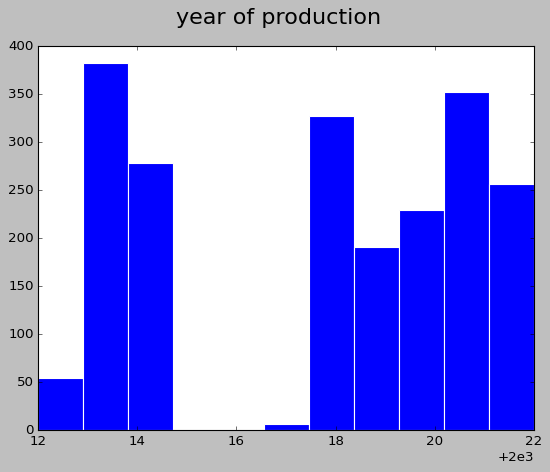

In [32]:
plt.style.use('classic')

fig, axes = plt.subplots(1, 1, figsize = (8,6))

N, bins, patches = axes.hist(reports['productYear'].tolist(), bins=11, edgecolor='white')
fig.suptitle("year of production", fontsize=20)
plt.savefig('/content/drive/MyDrive/PRAKTIKUM 6/hist.png')
;

''

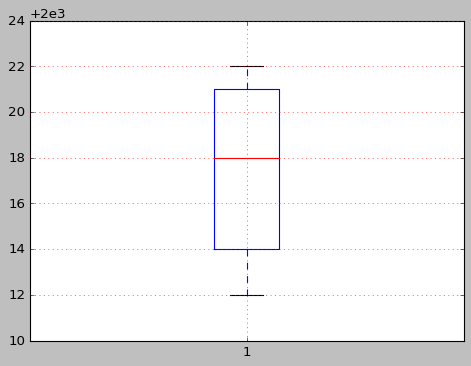

In [33]:
fig1, axes1 = plt.subplots(1, 1, figsize=(7,5))
axes1.boxplot(x=reports['productYear'].tolist())
axes1.set_ylim(2010, 2024)
axes1.grid(color=(1, 0, 0))
plt.savefig('/content/drive/MyDrive/PRAKTIKUM 6/moustache.png')
;

''

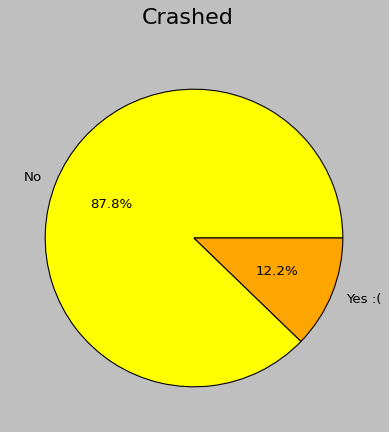

In [34]:
fig2, axes2 = plt.subplots(1, 1, figsize=(6,6))

values, counts = np.unique(np.array(reports['crash'].tolist()), return_counts=True)

fig2.suptitle("Crashed", fontsize=20)
pie_colors=['yellow', 'orange']
axes2.pie(counts, labels=['No', 'Yes :('], autopct='%1.1f%%', colors=pie_colors)
plt.savefig('/content/drive/MyDrive/PRAKTIKUM 6/pie.png')
;

In [35]:
reps_prepared = reports.copy()

reps_prepared.drop(columns=['manufacturer', 'odiNumber','dateOfIncident','dateComplaintFiled','vin','description','type','productMake'], inplace=True)

models_values = set(reps_prepared['productModel'].tolist())
models = dict(zip(models_values, [i for i in range(len(models_values))]))
models

{'MODEL 3': 0, 'MODEL X': 1, 'MODEL S': 2, 'MODEL Y': 3}

In [36]:
values_list = [x.split(",") for x in tuple(reps_prepared['components'].tolist())]

values = []

for i in values_list:
  values += i

values = set(values)
components = dict(zip(values, [i for i in range(len(values))]))
components

{'ENGINE': 0,
 ' Harness': 1,
 'BACK OVER PREVENTION': 2,
 'STEERING': 3,
 'LATCHES/LOCKS/LINKAGES': 4,
 'VEHICLE SPEED CONTROL': 5,
 'LANE DEPARTURE': 6,
 'Chest Clip': 7,
 'FORWARD COLLISION AVOIDANCE': 8,
 'FUEL/PROPULSION SYSTEM': 9,
 ' Buckle': 10,
 ' HYDRAULIC': 11,
 'SEATS': 12,
 ' GASOLINE': 13,
 'WHEELS': 14,
 'VISIBILITY/WIPER': 15,
 'SUSPENSION': 16,
 'EQUIPMENT': 17,
 'ELECTRICAL SYSTEM': 18,
 'ELECTRONIC STABILITY CONTROL': 19,
 'SERVICE BRAKES': 20,
 'VISIBILITY': 21,
 'FIRERELATED': 22,
 'POWER TRAIN': 23,
 'EXTERIOR LIGHTING': 24,
 'TIRES': 25,
 'STRUCTURE': 26,
 'AIR BAGS': 27,
 'UNKNOWN OR OTHER': 28,
 'SEAT BELTS': 29,
 'FUEL SYSTEM': 30}

In [37]:
reps_prepared['productModel'] = reps_prepared['productModel'].map(
    lambda x : models[x]
)
reps_prepared['components'] = reps_prepared['components'].map(
    lambda x : x.split(",")
)
reps_prepared['components'] = reps_prepared['components'].map(
    lambda x : [components[i] for i in x]
)
reps_prepared

,crash,fire,numberOfInjuries,numberOfDeaths,components,productYear,productModel
0,False,False,0,0,[18],2012,2
1,False,False,0,0,"[18, 15]",2012,2
2,False,False,0,0,"[18, 28]",2012,2
3,False,False,0,0,"[18, 24]",2012,2
4,False,False,0,0,"[24, 21, 2]",2012,2
...,...,...,...,...,...,...,...
2078,False,False,0,0,[14],2022,1
2079,False,False,0,0,"[27, 29, 28]",2022,1
2080,False,False,0,0,"[5, 20, 8]",2022,1
2081,True,False,0,0,[6],2022,1


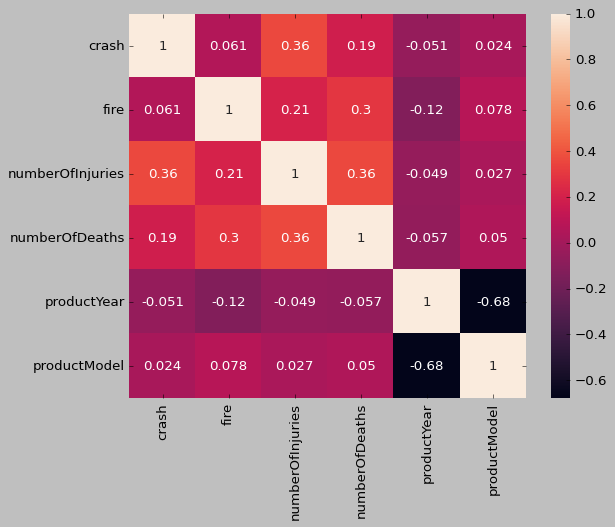

In [38]:
sb.heatmap(reps_prepared.corr(), annot=True, )
plt.savefig('/content/drive/MyDrive/PRAKTIKUM 6/heatmap.png')

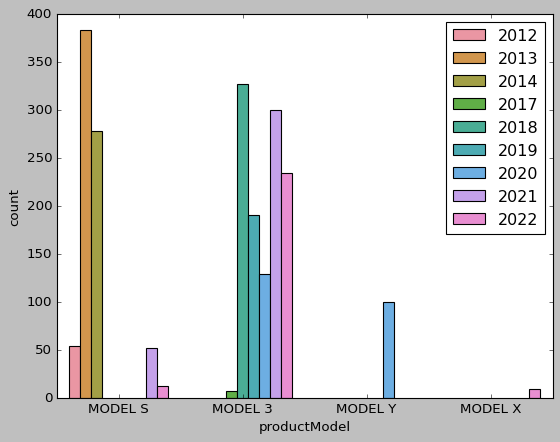

In [39]:
sb.countplot(x = 'productModel', hue='productYear', data=reports)
plt.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/PRAKTIKUM 6/count.png')

In [40]:
reports.isnull().sum()

odiNumber              0
manufacturer           0
crash                  0
fire                   0
numberOfInjuries       0
numberOfDeaths         0
dateOfIncident         0
dateComplaintFiled     0
vin                   56
components             0
description            0
type                   0
productYear            0
productMake            0
productModel           0
dtype: int64

In [19]:
# пропущенные значения только в столбце 'vin'

In [43]:
mode = reports['vin'].mode()[0]
mode
reports.loc[reports['vin'].isnull(), 'vin'] = mode

In [44]:
reports.isnull().sum()

odiNumber             0
manufacturer          0
crash                 0
fire                  0
numberOfInjuries      0
numberOfDeaths        0
dateOfIncident        0
dateComplaintFiled    0
vin                   0
components            0
description           0
type                  0
productYear           0
productMake           0
productModel          0
dtype: int64

In [45]:
sliced = reports['numberOfInjuries'].iloc[0:199]
stats.normaltest(sliced)

NormaltestResult(statistic=426.10875271859874, pvalue=2.962511206227413e-93)

In [46]:
# p-value -> 0, значит наша выборка не является нормальным распределением

In [47]:
encoded_reports = pd.get_dummies(reports, columns=['productModel', 'productYear'])
encoded_reports

,odiNumber,manufacturer,crash,fire,numberOfInjuries,numberOfDeaths,dateOfIncident,dateComplaintFiled,vin,components,...,productModel_MODEL Y,productYear_2012,productYear_2013,productYear_2014,productYear_2017,productYear_2018,productYear_2019,productYear_2020,productYear_2021,productYear_2022
0,11444023,"Tesla, Inc.",False,False,0,0,11/18/2021,12/16/2021,5yjsa1cn8cf,ELECTRICAL SYSTEM,...,0,1,0,0,0,0,0,0,0,0
1,11442524,"Tesla, Inc.",False,False,0,0,12/01/2021,12/03/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,VISIBILITY/WIPER",...,0,1,0,0,0,0,0,0,0,0
2,11441219,"Tesla, Inc.",False,False,0,0,11/19/2021,11/21/2021,5YJSA1CN3CF,"ELECTRICAL SYSTEM,UNKNOWN OR OTHER",...,0,1,0,0,0,0,0,0,0,0
3,11435793,"Tesla, Inc.",False,False,0,0,10/05/2021,10/06/2021,5YJSA1DPXCF,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING",...,0,1,0,0,0,0,0,0,0,0
4,11434130,"Tesla, Inc.",False,False,0,0,09/22/2021,09/23/2021,5yjsa1cp0cf,"EXTERIOR LIGHTING,VISIBILITY,BACK OVER PREVENTION",...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,11462408,"Tesla, Inc.",False,False,0,0,04/25/2022,04/27/2022,7SAXCBE50NF,WHEELS,...,0,0,0,0,0,0,0,0,0,1
2079,11459186,"Tesla, Inc.",False,False,0,0,03/28/2022,04/01/2022,7SAXCBE62NF,"AIR BAGS,SEAT BELTS,UNKNOWN OR OTHER",...,0,0,0,0,0,0,0,0,0,1
2080,11458566,"Tesla, Inc.",False,False,0,0,03/27/2022,03/28/2022,7SAXCBE58NF,"VEHICLE SPEED CONTROL,SERVICE BRAKES,FORWARD C...",...,0,0,0,0,0,0,0,0,0,1
2081,11456483,"Tesla, Inc.",True,False,0,0,03/12/2022,03/13/2022,7SAXCBE51NF,LANE DEPARTURE,...,0,0,0,0,0,0,0,0,0,1


In [48]:
encoded_reports.to_csv('/content/drive/MyDrive/PRAKTIKUM 6/reports.csv', index=False, header=True)